# Curso de Scikit-Learn: Regressão, Classificação e Clustering

In [ ]:
import pandas as pd

### DataSet


In [ ]:
uri_colesterol = 'https://gist.githubusercontent.com/davidneves11/01b2963f7a8dfd87d79010fbf847b221/raw/685870f4365bcda4e5bb9e342285e0aac37dd556/colesterol.csv'

uri_cardiaco = 'https://gist.githubusercontent.com/davidneves11/d72e7f49ab01c856acc5d07be4b1a9dd/raw/37631e3a40da92e6261c00fffdf0fb9b869b35dd/batimentos%2520cardiacos.csv'

uri_diabetes = 'https://gist.githubusercontent.com/davidneves11/944edb5ecb7bf6d1770eae91cb20d049/raw/50d3d054185815b0c49561f94badedc06ef3c313/diabetes.csv'

In [ ]:
colesterol = pd.read_csv(uri_colesterol)
colesterol.head()

In [ ]:
diabetes = pd.read_csv(uri_diabetes)
diabetes.head()

In [ ]:
cardiaco = pd.read_csv(uri_cardiaco)
cardiaco.head()

### Criando um modelo, treinando e testando

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
#Excluindo a coluna resultado o x irá trabalhar com todas as features
x = diabetes.drop(columns = 'resultado')  
x.head()

In [ ]:
y = diabetes['resultado']
y

In [ ]:
SEED = 4121988
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y) #Separação


### Decision Tree

In [ ]:
from  sklearn.tree import DecisionTreeClassifier

In [ ]:
clf_arvore = DecisionTreeClassifier(random_state = SEED, max_depth = 3)  # profundidade maxima do crescimento da árvore

In [ ]:
clf_arvore.fit(x_treino, y_treino)

In [ ]:
acuracia = clf_arvore.score(x_teste, y_teste) * 100
print('A acuracia foi de % .2f%%' % acuracia)

### Comparar a acuraria com Dummy Classifier

In [ ]:
from sklearn.dummy import DummyClassifier

In [ ]:
clf_dummy = DummyClassifier(strategy = 'most_frequent')  # Vai utilizar os resultados mais frequentes

clf_dummy.fit(x_treino, y_treino)


In [ ]:
acuracia_dummy = clf_dummy.score(x_teste, y_teste) * 100
print('A acuracia DUMMY foi de % .2f%%' % acuracia_dummy)

# A acuracia verdadeira foi melhor que a acuracia dummy

### Exibindo decision tree 

In [ ]:
import matplotlib.pyplot as plt
from sklearn import tree

In [ ]:
fig, ax = plt.subplots(figsize=(15, 10))
tree.plot_tree(clf_arvore, ax=ax, fontsize=10, rounded = True, filled = True, feature_names= x_treino.columns, class_names=['nao ativado', 'Ativado'], rotate=True)

### Posso visualizar a árvore de decisão utilizando Graphviz

In [ ]:
from sklearn.tree import export_graphviz
import graphviz

In [ ]:
features = x.columns

clf_data = export_graphviz(clf_arvore, out_file=None, feature_names=features, filled=True, rounded=True, class_names=['Não Ativado', 'Ativado'])
grafico = graphviz.Source(clf_data)
grafico

## Regressão Linear
## Função: y = a.x + b

In [ ]:
cardiaco.head()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
sns.set()
plt.figure(figsize=(100,100))

# lmplot já mostra uma reta de regressão
sns.lmplot(x = 'Peso', y = 'Batimentos cardiacos', data=cardiaco, line_kws={'color' : 'red'})

plt.show()

In [ ]:
x = cardiaco[['Peso', 'Idade']]  
x.head()

In [ ]:
y = cardiaco[['Batimentos cardiacos']]
y.head()

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
SEED = 4500

x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, random_state=SEED)


### Linear Model

In [ ]:
from sklearn import linear_model

In [ ]:
rgs = linear_model.LinearRegression(fit_intercept=False, normalize=True)

In [ ]:
modelo = rgs.fit(x_treino, y_treino)

In [ ]:
acuracia = rgs.score(x_teste, y_teste) * 100 
print('Regressão Linear Acuracia %.2f %%' % acuracia)

# Clustering (Agrupamento) - É método mais utilizado para aprendizado não supervisionado

### O Algoritmo separa por grupos semelhantes de itens iguais ou diferentes (grupos de imagens, textos...)

In [34]:
colesterol.head()

,idade,genero,tipo_dor_peito,pressao_sanguinea_repouso,acucar_jejum,resultado_eletrocardio,freq_cardio_max,angina_exercicio,depressao_induzida_exercicio,inclinacao,num_princ_vasos,thal,diag_doenca_cardiaca,colesterol
0,63,1,1,145,1,2,150,0,2.3,3,0,6,0,233
1,67,1,4,160,0,2,108,1,1.5,2,3,3,2,286
2,67,1,4,120,0,2,129,1,2.6,2,2,7,1,229
3,37,1,3,130,0,0,187,0,3.5,3,0,3,0,250
4,41,0,2,130,0,2,172,0,1.4,1,0,3,0,204


In [36]:
colesterol[['pressao_sanguinea_repouso', 'colesterol']].head()

,pressao_sanguinea_repouso,colesterol
0,145,233
1,160,286
2,120,229
3,130,250
4,130,204


In [37]:
import seaborn as sns

Text(0, 0.5, 'Colesterol')

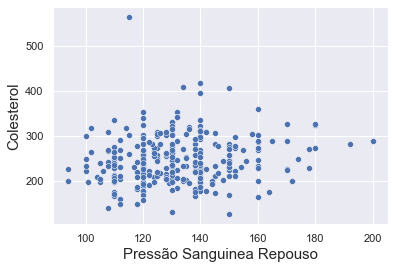

In [48]:
#
grafico = sns.scatterplot(x = 'pressao_sanguinea_repouso', y = 'colesterol', data = colesterol)
grafico.set_xlabel('Pressão Sanguinea Repouso', fontsize = 15)
grafico.set_ylabel('Colesterol', fontsize = 15)

## UtilIzando K-MEANS

In [49]:
from sklearn.cluster import KMeans

In [51]:
kmeans = KMeans(n_clusters = 2, random_state = 9) # n_clusters = Numero de grupos que será dividido

### Como o aprendizado é o não supervisionado, é necessário apenas passar o x, pois o y (target) é o resultado que estamos buscando

In [55]:
x = colesterol
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   idade                         303 non-null    int64  
 1   genero                        303 non-null    int64  
 2   tipo_dor_peito                303 non-null    int64  
 3   pressao_sanguinea_repouso     303 non-null    int64  
 4   acucar_jejum                  303 non-null    int64  
 5   resultado_eletrocardio        303 non-null    int64  
 6   freq_cardio_max               303 non-null    int64  
 7   angina_exercicio              303 non-null    int64  
 8   depressao_induzida_exercicio  303 non-null    float64
 9   inclinacao                    303 non-null    int64  
 10  num_princ_vasos               303 non-null    object 
 11  thal                          303 non-null    object 
 12  diag_doenca_cardiaca          303 non-null    int64  
 13  coles

In [56]:
# Será selecionado apenas as colunas com int64, pois não foi possivel treinar utilziando o kmeans com int, float e object no mesmo dataframe
x = colesterol.select_dtypes('int64')
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   idade                      303 non-null    int64
 1   genero                     303 non-null    int64
 2   tipo_dor_peito             303 non-null    int64
 3   pressao_sanguinea_repouso  303 non-null    int64
 4   acucar_jejum               303 non-null    int64
 5   resultado_eletrocardio     303 non-null    int64
 6   freq_cardio_max            303 non-null    int64
 7   angina_exercicio           303 non-null    int64
 8   inclinacao                 303 non-null    int64
 9   diag_doenca_cardiaca       303 non-null    int64
 10  colesterol                 303 non-null    int64
dtypes: int64(11)
memory usage: 26.2 KB


In [57]:
kmeans.fit(x)

KMeans(n_clusters=2, random_state=9)

### Verificar os grupos depois do treino

In [58]:
kmeans.labels_


array([1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,

Text(0, 0.5, 'Colesterol')

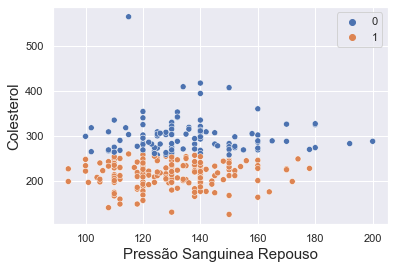

In [60]:
grafico = sns.scatterplot(x = 'pressao_sanguinea_repouso', y = 'colesterol', data = colesterol, hue = kmeans.labels_)
grafico.set_xlabel('Pressão Sanguinea Repouso', fontsize = 15)
grafico.set_ylabel('Colesterol', fontsize = 15)

In [62]:
colesterol['clusters'] = kmeans.labels_  # Criando uma coluna com os clusters
colesterol.head()

,idade,genero,tipo_dor_peito,pressao_sanguinea_repouso,acucar_jejum,resultado_eletrocardio,freq_cardio_max,angina_exercicio,depressao_induzida_exercicio,inclinacao,num_princ_vasos,thal,diag_doenca_cardiaca,colesterol,clusters
0,63,1,1,145,1,2,150,0,2.3,3,0,6,0,233,1
1,67,1,4,160,0,2,108,1,1.5,2,3,3,2,286,0
2,67,1,4,120,0,2,129,1,2.6,2,2,7,1,229,1
3,37,1,3,130,0,0,187,0,3.5,3,0,3,0,250,1
4,41,0,2,130,0,2,172,0,1.4,1,0,3,0,204,1


### Agrupar a coluna de CLUSTERS baseada na média do colesterol

In [63]:
colesterol.groupby('clusters')['colesterol'].mean()

clusters
0    298.963964
1    216.473958
Name: colesterol, dtype: float64